In [ ]:
from google.colab import files
files.upload()

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
file = pd.read_csv('People disappeared during Maoist war.csv')

In [6]:
file.head(3)

,Missing/Dead,District,Zone,Geographical Region,Development Region,Full Name,Gender,Date of Birth,Year of birth,Place Of Birth,Father'S Name,Date of disapperance,Year of disaaperance,Place of disapperance,District of disapperance
0,Death,Achham,Seti,Hill,Far-Western,Bhoj Bahadur Mijar,M,00/00/1972,1972,Achham,Bhaire Mijar,20/11/2002,2002,Dipayal,Doti
1,Death,Achham,Seti,Hill,Far-Western,Dabal Bahadur Saud,M,00/11/1959,1959,Achham,Dal Bahadur Saud,3/9/2004,2004,Ramarosan,Achham
2,Death,Achham,Seti,Hill,Far-Western,Padam Raj Neupane,M,00/00/1985,1985,Achham,Umakanta Neupane,5/3/2005,2005,Batulasen,Achham


##### Rename the column

In [0]:
file.rename(columns={'Missing/Dead': 'miss_dead', 'Geographical Region': 'geo_region', 'evelopment Region':'dev_region', "Father'S Name":'Father_name'}, inplace=True)

In [11]:
file.head(3)

,miss_dead,District,Zone,geo_region,Development Region,Full Name,Gender,Date of Birth,Year of birth,Place Of Birth,Father_name,Date of disapperance,Year of disaaperance,Place of disapperance,District of disapperance
0,Death,Achham,Seti,Hill,Far-Western,Bhoj Bahadur Mijar,M,00/00/1972,1972,Achham,Bhaire Mijar,20/11/2002,2002,Dipayal,Doti
1,Death,Achham,Seti,Hill,Far-Western,Dabal Bahadur Saud,M,00/11/1959,1959,Achham,Dal Bahadur Saud,3/9/2004,2004,Ramarosan,Achham
2,Death,Achham,Seti,Hill,Far-Western,Padam Raj Neupane,M,00/00/1985,1985,Achham,Umakanta Neupane,5/3/2005,2005,Batulasen,Achham


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


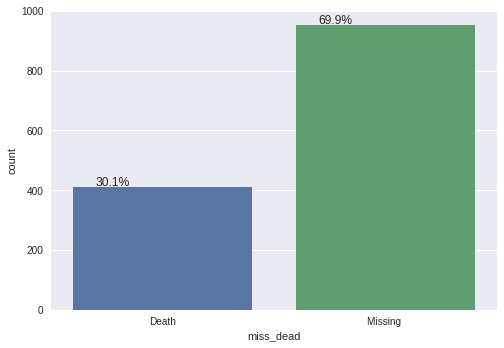

In [28]:
total = len(file)*1
ax = sns.countplot('miss_dead',data=file)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))


In [0]:
# In every 100 missing/dead people during the war, about 30 of them are found dead and rest 70 are still missing.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


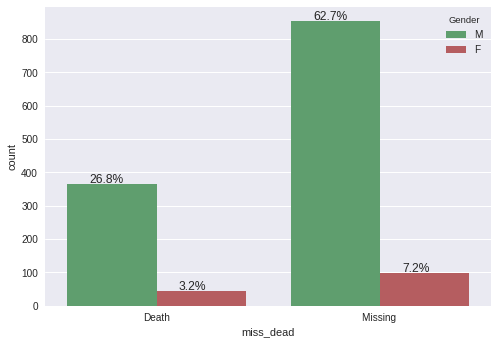

In [23]:
ax = sns.countplot('miss_dead',data=file,hue='Gender',palette=[ "C1","C2"])
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

In [0]:
# for every 1000 people dead/missing during the war, 268 of dead people are male and 32 of dead are female similarly 627 missing people are male and 72 are female missing. 

In [66]:
district_datst = file['Place Of Birth'].unique()
list_of_district = ['Bhojpur','Dhankuta','Morang','Sankhuwasabha','Sunsari','Terathum','Illam','Jhapa','Panchthar','Taplejung','Khotang','Okhaldhunga','Saptari','Siraha','Solukhumbu','Udayapur','Bhaktapur','Dhading','Kathmandu','Kavrepalanchok','Lalitpur','Nuwakot','Rasuwa','Sindhupalchowk','Dhanusa','Dolkha','Mahottari','Ramechhap','Sarlahi','Sindhuli','Bara','Chitwan','Makwanpur','Parsa','Rautahat','Baglung','Mustang','Myagdi','Parbat','Gorkha','Kaski','Lamjung','Manang','Syangja','Tanahu','Arghakhanchi','Gulmi','Kapilvastu','Nawalparasi','Palpa','Rupandehi','Banke','Bardiya','Dailekh','Jajarkot','Surkhet','Dolpa','Humla','Jumla','Kalikot','Mugu','Dang','Pyuthan','Rolpa','Rukum','Salyan','Baidadi','Dadeldhura','Darchula','Kanchanpur','Achham','Bajhang','Bajura','Doti','Kailali']
print(list(set(list_of_district) - set(district_datst)))
list(set(district_datst) - set(list_of_district))

['Manang', 'Dolkha', 'Terathum', 'Solukhumbu', 'Bajura', 'Mustang', 'Baidadi', 'Kavrepalanchok', 'Illam', 'Kapilvastu']


['Baitadi',
 'Unknown',
 'Terhathum',
 'Dolakha',
 'Kavrepalanchowk',
 'Ilam',
 'Kapilbastu',
 'Solukhumbhu']

###### There is no official documentation for people from 3 district viz 'Manang','Bajura' and 'Mustang'.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


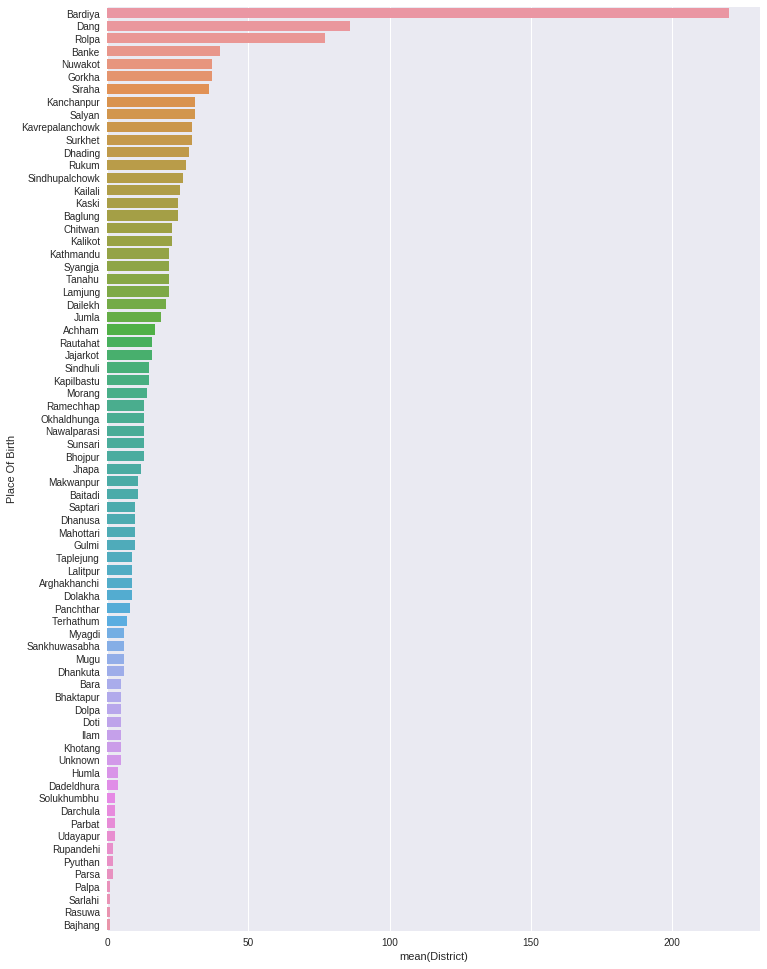

In [61]:
sns.set(rc={'figure.figsize':(11.7,17)})
by_place = file.groupby('Place Of Birth').count()
by_place.reset_index(level=0, inplace=True)
# by_place.sort_values()
sns.barplot(y='Place Of Birth',x='District',data=by_place.sort_values(by='District',ascending=False))

###### bardiya, dang and rolpa district have more complaints in people missing/dead.

In [83]:
file['Year of birth'].value_counts()

1980    77
1979    75
1983    75
1982    71
1984    68
1981    68
1977    65
1978    61
1975    53
1976    48
1985    48
1971    46
1974    43
1969    41
1972    40
1986    36
1970    36
1973    32
1967    30
1987    27
1968    27
1966    25
1963    21
1961    21
1965    20
1959    19
1962    19
1964    16
1958    15
1988    13
1989    13
1960    11
1953     9
1956     9
1957     9
1950     8
1951     7
1955     7
1948     7
1946     6
1945     5
1949     4
1944     4
1990     4
1947     3
1941     3
1992     3
1954     3
1952     2
1991     2
1942     1
1940     1
2001     1
1943     1
1999     1
1938     1
Name: Year of birth, dtype: int64

###### Those people who are dead/missing are mostly born inbetween 1975-1983 as moist war last from 1996 to 2006. So,when the war was started they are at the age between 13-23

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


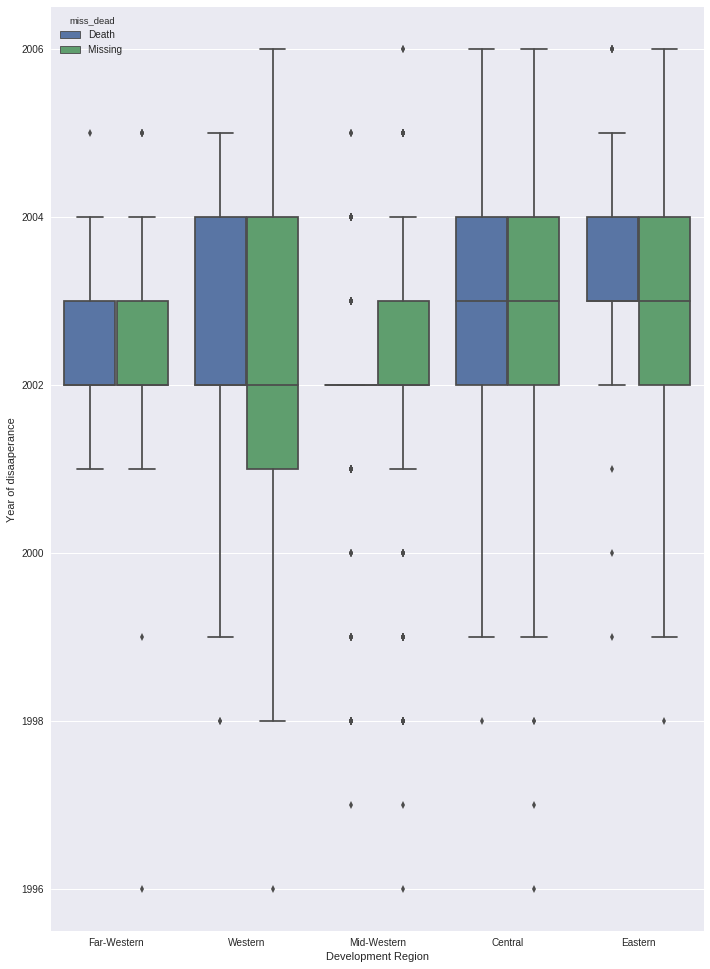

In [85]:
sns.boxplot(x='Development Region',hue='miss_dead',y='Year of disaaperance',data=file)

##### 1)People start missing from Western development region
##### 2)There is very few dead people report from Mid-Western Development Region
##### 3)After year 2003 people missing/dead report from Far-Western and Mid-western are reduced dramatically.

